In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
import pandas as pd

from tabulate import tabulate
from scipy.stats import beta

In [3]:
#Example Data 생성

ex_data1=pd.DataFrame({'x1':[6,10,7,8,9,12,16,7,9,15,8,20,16,22,11,15,9,15,8,13],
                      'x2':[9,4,8,9,10,11,10,5,7,16,12,21,9,21,7,10,8,7,6,14],
                      'x3':[10,6,10,6,7,10,8,10,8,10,14,19,13,19,10,11,12,10,9,11],
                      'x4':[15,11,5,13,13,10,9,4,12,13,16,22,15,25,16,14,10,11,12,15]}
                      )
                     

In [4]:
ex_data1

,x1,x2,x3,x4
0,6,9,10,15
1,10,4,6,11
2,7,8,10,5
3,8,9,6,13
4,9,10,7,13
5,12,11,10,10
6,16,10,8,9
7,7,5,10,4
8,9,7,8,12
9,15,16,10,13


In [5]:
d2=[0,0,1.128,1.693,2.059,2.326,2.534,2.704,2.847,2.970,3.078]

In [6]:
def EWMA(data, target: int=None, std:int=None, rate:float=None, width:float=None):
    
    period=np.reshape(np.arange(data.shape[0])+1, (data.shape[0],1))
    data=np.reshape(np.array(data),(data.shape[0],1))
    
    if target is None:
        target=np.mean(data)
        
    if std is None:
        rbar=[]
        for i in range(data.shape[0]-1):
            rbar.append(abs(data[i]-data[i+1]))
            
        std=np.mean(rbar)/d2[2]
        
    z=np.zeros((data.shape[0]+1,1))
    EWMA_UCL=np.zeros((data.shape[0]+1,1))
    EWMA_LCL=np.zeros((data.shape[0]+1,1))
    
    z[0]=target
    
    for i in range(1, data.shape[0]+1):
        z[i]=rate*data[i-1]+(1-rate)*z[i-1]
        
    for i in range(data.shape[0]+1):
        EWMA_UCL[i]=target + width*std*np.sqrt(rate/(2-rate)*(1-np.power(1-rate,2*i)))
        EWMA_LCL[i]=target - width*std*np.sqrt(rate/(2-rate)*(1-np.power(1-rate,2*i)))
        
    print(f'Rate={rate} & Width={width}')
    
    print('EWMA Statistics Table')
    
    tabular_EWMA=np.hstack((period,data,z[1:],EWMA_UCL[1:],EWMA_LCL[1:]))
    print(tabulate(tabular_EWMA, headers=['Period','Input','Z-value','UCL','LCL']))
    
    return z, EWMA_UCL, EWMA_LCL, target
                      

In [7]:
z,EWMA_UCL,EWMA_LCL,target=EWMA(ex_data1['x1'],std=1.0,rate=0.2,width=3)

Rate=0.2 & Width=3
EWMA Statistics Table
  Period    Input    Z-value      UCL      LCL
--------  -------  ---------  -------  -------
       1        6   10.64     12.4     11.2
       2       10   10.512    12.5684  11.0316
       3        7    9.8096   12.659   10.941
       4        8    9.44768  12.7123  10.8877
       5        9    9.35814  12.7448  10.8552
       6       12    9.88652  12.765   10.835
       7       16   11.1092   12.7778  10.8222
       8        7   10.2874   12.7858  10.8142
       9        9   10.0299   12.791   10.809
      10       15   11.0239   12.7942  10.8058
      11        8   10.4191   12.7963  10.8037
      12       20   12.3353   12.7976  10.8024
      13       16   13.0682   12.7985  10.8015
      14       22   14.8546   12.799   10.801
      15       11   14.0837   12.7994  10.8006
      16       15   14.2669   12.7996  10.8004
      17        9   13.2136   12.7997  10.8003
      18       15   13.5708   12.7998  10.8002
      19        8   12.456

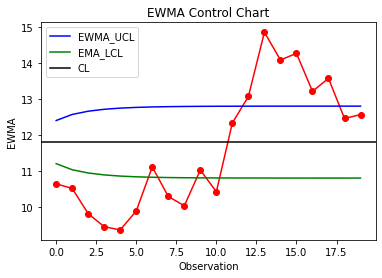

In [8]:
plt.plot(z[1:], marker='o', color='r')
plt.plot(EWMA_UCL[1:], color='b', label='EWMA_UCL')
plt.plot(EWMA_LCL[1:], color='g', label='EMA_LCL')
plt.axhline(target, color='black', label='CL')
plt.legend()
plt.title('EWMA Control Chart')
plt.xlabel('Observation')
plt.ylabel('EWMA')
plt.show()